In [1]:
import os, shutil

In [10]:


train_datadir = 'C:\\Users\\Prashant\\Desktop\\Deep learning with python\\dogs-vs-cats\\train\\train'


base_dir = 'C:\\Users\\Prashant\\Desktop\\Deep learning with python\\cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(train_datadir, fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]

for fname in fnames:
    src = os.path.join(train_datadir,fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]

for fname in fnames:
    src = os.path.join(train_datadir,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(train_datadir,fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]

for fname in fnames:
    src = os.path.join(train_datadir,fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]

for fname in fnames:
    src = os.path.join(train_datadir,fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)
    
#Check




Cat training images: 1000


NameError: name 'trian_dogs_dir' is not defined

In [11]:
print('Cat training images:',len(os.listdir(train_cats_dir)))
print('Dogs training images:',len(os.listdir(train_dogs_dir)))

print('Cats validation images:',len(os.listdir(validation_cats_dir)))


Cat training images: 1000
Dogs training images: 1000
Cats validation images: 500


In [13]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       1

In [15]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [17]:
# Data generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
for data_batch , label_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('label batch shape: ',label_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
label batch shape:  (20,)


In [19]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data= validation_generator,
                             validation_steps=50)

Epoch 1/30


W0903 17:24:47.860430   868 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


100/100 [==============================] - 81s 812ms/step - loss: 0.6925 - acc: 0.5155 - val_loss: 0.6800 - val_acc: 0.5670
Epoch 2/30
100/100 [==============================] - 74s 737ms/step - loss: 0.6621 - acc: 0.5965 - val_loss: 0.6366 - val_acc: 0.6300
Epoch 3/30
100/100 [==============================] - 73s 734ms/step - loss: 0.6111 - acc: 0.6670 - val_loss: 0.6063 - val_acc: 0.6700
Epoch 4/30
100/100 [==============================] - 74s 737ms/step - loss: 0.5716 - acc: 0.7000 - val_loss: 0.5922 - val_acc: 0.6840
Epoch 5/30
100/100 [==============================] - 74s 738ms/step - loss: 0.5414 - acc: 0.7305 - val_loss: 0.5763 - val_acc: 0.6960
Epoch 6/30
100/100 [==============================] - 76s 760ms/step - loss: 0.5170 - acc: 0.7495 - val_loss: 0.6169 - val_acc: 0.6730
Epoch 7/30
100/100 [==============================] - 110s 1s/step - loss: 0.4950 - acc: 0.7670 - val_loss: 0.5822 - val_acc: 0.6930
Epoch 8/30
100/100 [==============================] - 123s 1s/step -

In [20]:
model.save('cats_and_dogs_1.h5')

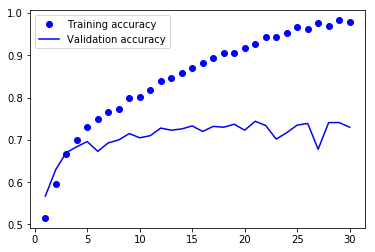

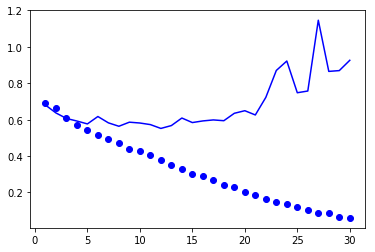

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')

plt.show()